# Collect Data 

In [1]:
import wget
import tarfile
import os
import time

DataSet_URL = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
DataSet_Path = os.path.join("DataSet","Housing")

In [2]:
#Fetech Data
def Fetch_Data(URL=None,DIR=None)->None:
    if not os.path.isdir(DIR):
        os.makedirs(DIR)
    wget.download(URL,DIR)
    tarPath = os.path.join(DIR,"housing.tgz")
    tgzFile = tarfile.open(tarPath)
    tgzFile.extractall(DIR)
    tgzFile.close()


In [3]:
Fetch_Data(DataSet_URL,DataSet_Path)

In [3]:
import pandas

#This will return the dataframe object 
def GetDataFrame(DIR=None):
    dataFramePath = os.path.join(DIR,"housing.csv")
    return pandas.read_csv(dataFramePath)

In [4]:
dF = GetDataFrame(DataSet_Path)

In [5]:
dF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
dF.info()
dF['total_bedrooms'].value_counts(dropna=False)

In [ ]:
print(dF['ocean_proximity'].value_counts())
dF['ocean_proximity'].count()

In [6]:
dF.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
print(dF.iloc[dF['total_rooms'].idxmin()])
dF.iloc[dF['total_bedrooms'].idxmin()]

In [7]:
import matplotlib.pyplot as plt

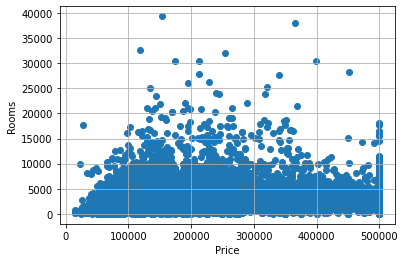

<Figure size 576x720 with 0 Axes>

In [8]:
plt.scatter(dF['median_house_value'],dF['total_rooms'])
plt.xlabel("Price")
plt.ylabel("Rooms")
plt.grid()
plt.figure(figsize=(8,10))
plt.show()

20640


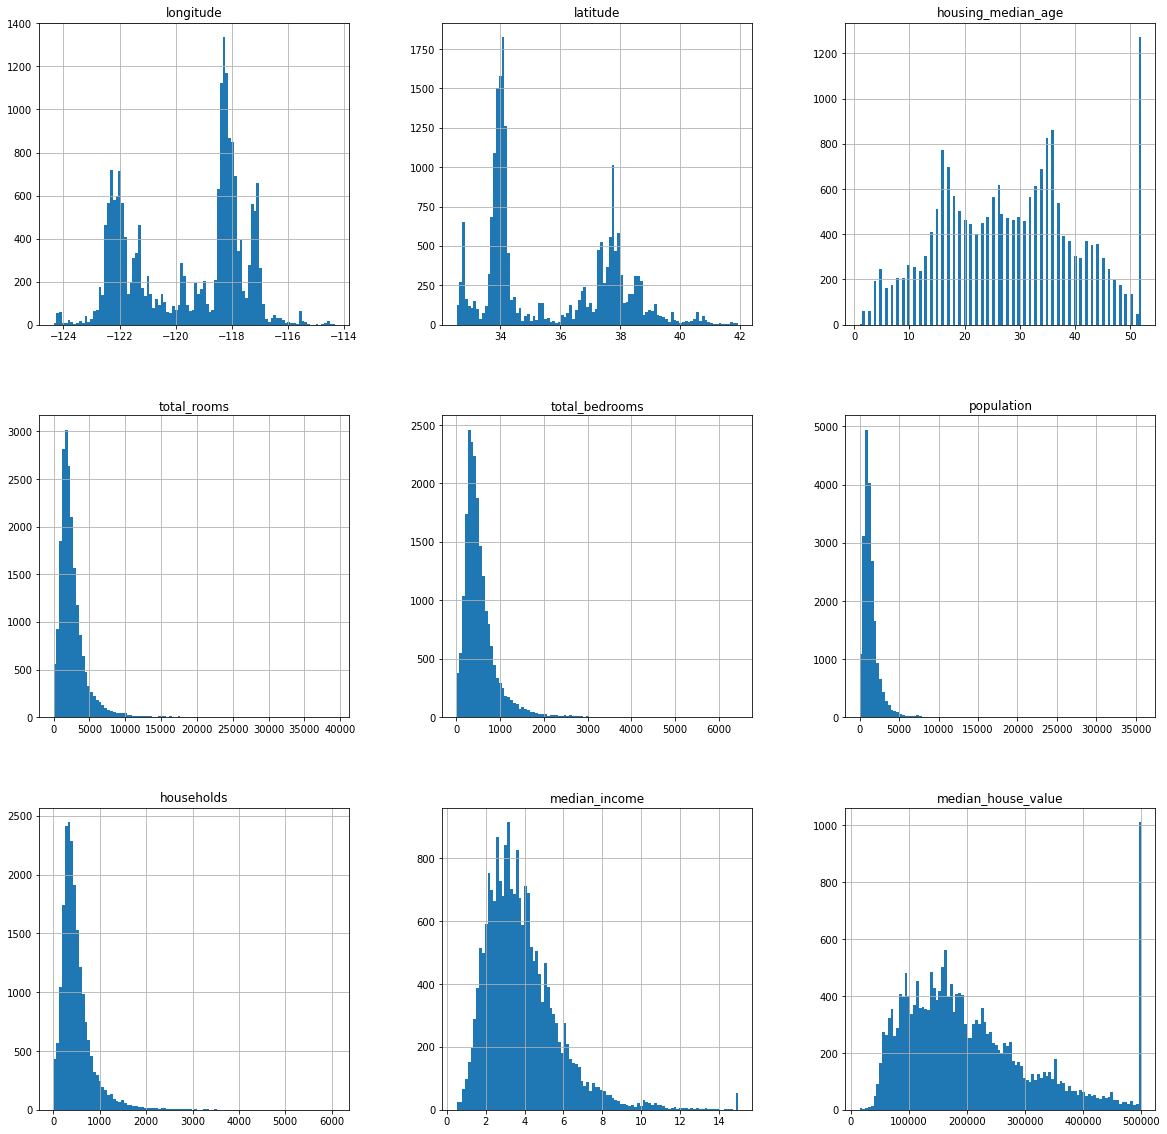

In [82]:
dF.hist(figsize=(20,20),bins=100)
print(len(dF))

Split Data

In [8]:
import numpy as np # To create the array of random numbers ranging from 1 to n
def Slpit_Data(df,ratio):
    """RETURNS train data and test data respectively"""
    np.random.seed(90)# This will keep permutation same for each call
    indices = np.random.permutation(len(df))
    test_I = int(len(df)*ratio)
    test_Indices = indices[:test_I]
    train_Indices = indices[test_I:]
    return (df.iloc[train_Indices]), (df.iloc[test_Indices])

In [10]:
train_Data, test_Data = Slpit_Data(dF,0.2)
print(len(train_Data))
print(len(test_Data))

16512
4128


When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick
1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population. This is called stratified sampling

In this dataset house_median_income is important attribute to predict house price so we must ensure that 
it is equally distributed in our test as well as train dataset.

median_income is spread from 0.5 to 6 so we have to ensure that our test and train data set must contain atleast one instance from each specific range

So, for that we will be using pandas.cut(array<1-dimensional>, bin, labels) function which will create bins.

In [12]:
# dF.drop(columns="House_Cat",axis=1,inplace=True)

In [8]:
d = pandas.cut(dF["median_income"],bins=[0.,4.,8.,12.,14.,np.inf],labels=[1,2,3,4,5], right=True, retbins=True)
dF["House_Cat"] = list(d[0])

In [11]:
dF.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Now we will use build-in function to split data with respect to stratified attribute

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

sp = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=49)


In [16]:
#sp(x,y) where x is actual dataset to be split and y is stratified data so x is split according to y
# n_split in StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=49) returns n number of 
# rows where each row contains differnet test and train set indexes

x = np.array([1,2,3,4,5,5,1,1,4])
y = np.array([0,0,0,0,0,1,1,1,1])

for tr, te in sp.split(x,y):
    print("TRAIN : ", tr)
    print("TEST : ", te)
    xTrain, xTest = x[tr], x[te]
    yTrain, yTest = y[tr], y[te]
print(xTrain, xTest)
print(yTrain, yTest)


TRAIN :  [1 4 0 3 5 8 6]
TEST :  [7 2]
[2 5 1 4 5 4 1] [1 3]
[0 0 0 0 1 1 1] [1 0]


In [17]:
# Split data

for train_index, test_index in sp.split(dF,dF["House_Cat"]):
    Train_Set = dF.iloc[train_index]
    Test_Set = dF.iloc[test_index]


In [40]:
#As we have done separation we don't need Hosue_Cat column any more
dF.drop(columns="House_Cat",axis=1,inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

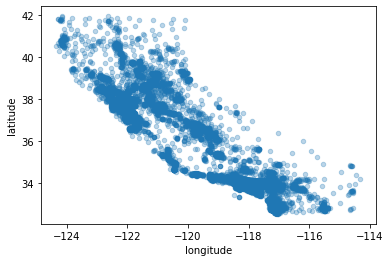

In [25]:
dF.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3)


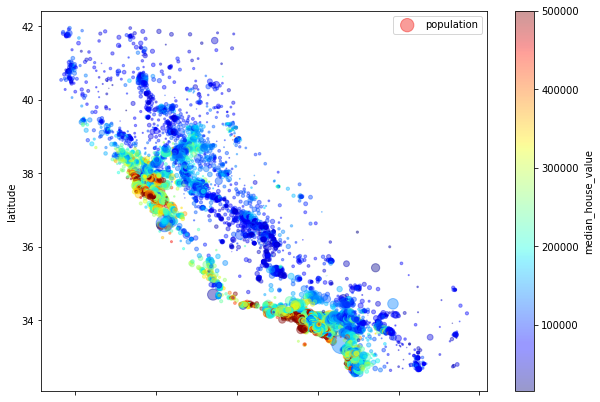

In [26]:
dF.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=dF["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

#The radius of each circle represents
#the district’s population (option s), and the color represents the price (option c). We
#use a predefined color map (option cmap) called jet, which ranges from blue
#(low values) to red (high prices)

In [41]:
x = dF.corr()
print(x["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute. Since there are now 11 numerical attributes, you would get 11^2 = 121 plots

In [48]:
house = dF.drop(columns="median_income",axis=1)
house1 = dF["median_income"]

In [49]:
house1

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

Get rid of NAN data

In [21]:
#Separate data according to numerical values and text
house_num = dF.drop(columns="ocean_proximity",axis=1)
house_cate = dF[["ocean_proximity"]]


In [36]:
from sklearn.impute import SimpleImputer

SI = SimpleImputer(strategy="median")
X = SI.fit_transform(house_num)
print(type(X))

#Convert array to data frame
House_Num = pandas.DataFrame(X,columns=house_num.columns)
print(type(House_Num))
House_Num.describe()# all 20640 values are present

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [37]:
# Use onehotencoder for text based data to make it numerical

#OneHotEncoder - One choosen value is 1 and others are 0's. It creates Sparse Matrix. Takes Space if dataset is large
#                Use toarray() method to convert it to dense matrix where non-zeros rows are only stored

#OriginalEncoder - this will use different numbers for different text. eg Near=1, far=2 ...
#                  because of this most ML algo will think that closer values are more related 
#                  while faraway values are loosely related. This can be valid for bad, average, good, best


from sklearn.preprocessing import OneHotEncoder

Encoder = OneHotEncoder()
House_Cate = Encoder.fit_transform(house_cate)
# print(House_Cate.toarray())


Try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably
want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at.

In [12]:
#Attribute combination
def AttributAdder():
    dF["rooms_per_household"] = dF["total_rooms"]/dF["households"]
    dF["population_per_household"]=dF["population"]/dF["households"]
    dF["bedrooms_per_room"] = dF["total_bedrooms"]/dF["total_rooms"]


In [39]:
corrMatrix = House_Num.corr()
corrMatrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

In [46]:
# Feature Scaling 

# Normalization = the values in that columns ranges from 0 to 1
# Formula : (Ai - Amin)/(Amax-Amin)
# Sklearn.preprocessing.MinMaxScalar

# Standardiztion = values not necessarily range from 0 to 1. we get variance.
# Standardization is much less affected by outliers
#Formula : (Ai-Amin)/standard deviation
# Sklearn.preprocessing.StandardScaler

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
HOUSE_N = SS.fit_transform(House_Num)


20640


Here what happens we are separating numbers and text for data processing but the final output after 
transformation is nd array so we cannot combine numbers and category together after processing 

For that we have to use columntransformer which will apply all required processing to number and category
columns accordingly and will output the nd array 

First we have to create pipeline for the data processing stages which the columntransfor has to follow

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [19]:
from sklearn.pipeline import Pipeline
Num_Pipeline = Pipeline([("imputer",SimpleImputer(strategy="median")),("AttributeAdder",AttributAdder()),("Std_Scaler",StandardScaler())])


In [22]:
x = list(dF)
x.remove('ocean_proximity')
print(x)

from sklearn.compose import ColumnTransformer
Num_Attributes = x
Category_Attribute = ["ocean_proximity"]

Full_Pipeline = ColumnTransformer([("NUMs",Num_Pipeline,Num_Attributes),("Category",OneHotEncoder(),Category_Attribute)])
Houseing_Prepared = Full_Pipeline.fit_transform(dF)

In [24]:
print(type(Houseing_Prepared))

<class 'numpy.ndarray'>
